**Name : Anuvind M P** <BR>
**Roll no : AM.EN.U4AIE22010**

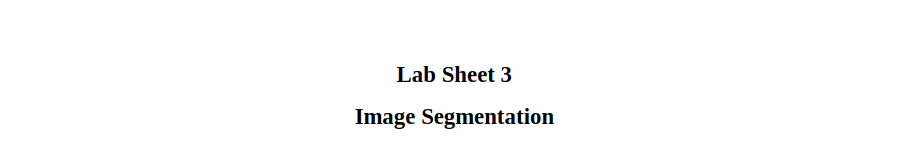

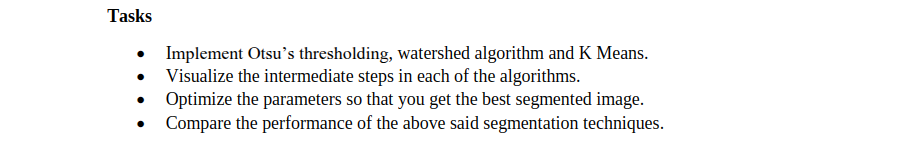

Original Image


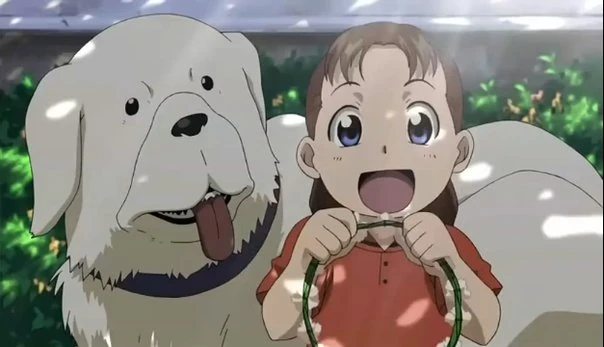

In [26]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load image
image = cv2.imread("/content/Nina_alexander.jpg")
print("Original Image")
cv2_imshow(image)

In [18]:
def otsu_threshold(image):
    hist, bins = np.histogram(image.ravel(), 256, [0, 256])
    total_pixels = image.size
    current_max, threshold = 0, 0
    sum_total, sum_background = 0, 0
    weight_background, weight_foreground = 0, 0

    for i in range(256):
        sum_total += i * hist[i]

    for i in range(256):
        weight_background += hist[i]
        if weight_background == 0:
            continue
        weight_foreground = total_pixels - weight_background
        if weight_foreground == 0:
            break
        sum_background += i * hist[i]
        mean_background = sum_background / weight_background
        mean_foreground = (sum_total - sum_background) / weight_foreground
        between_class_variance = weight_background * weight_foreground * (mean_background - mean_foreground) ** 2
        if between_class_variance > current_max:
            current_max = between_class_variance
            threshold = i
    binary_image = (image > threshold).astype(np.uint8) * 255
    return threshold, binary_image

In [19]:
def watershed_segmentation(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
    sure_bg = cv2.dilate(opening, kernel, iterations=3)
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)
    ret, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    markers[unknown == 255] = 0
    markers = cv2.watershed(image, markers)
    image[markers == -1] = [255, 0, 0]
    return image

In [20]:
def kmeans_segmentation(image, K=3):
    Z = image.reshape((-1, 3))
    Z = np.float32(Z)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    return res.reshape((image.shape))

In [27]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
otsu_thresh, binary_image = otsu_threshold(gray)
watershed_result = watershed_segmentation(image.copy())
kmeans_result = kmeans_segmentation(image.copy(), K=3)


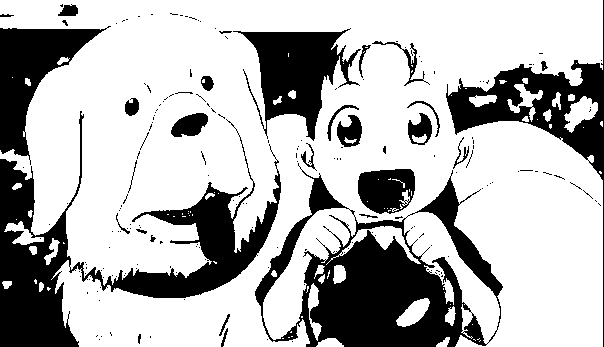

Otsu Thresholding


In [28]:
cv2_imshow(binary_image)
print("Otsu Thresholding")

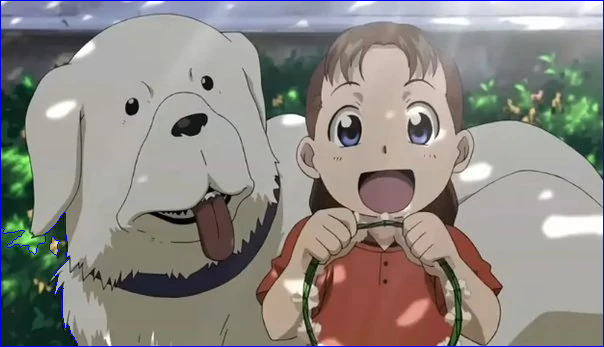

Watershed Segmentation


In [29]:
cv2_imshow(watershed_result)
print("Watershed Segmentation")

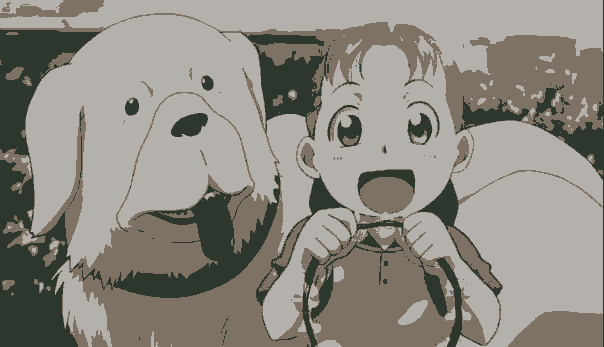

K-Means Segmentation


In [30]:
cv2_imshow(kmeans_result)
print("K-Means Segmentation")